数据来源 [国家卫生健康委员会](http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def mkX(x):
    return np.hstack([x.reshape(-1, 1), x.reshape(-1, 1)**3, x.reshape(-1, 1)**5,  x.reshape(-1, 1)**7,  x.reshape(-1, 1)**9, x.reshape(-1, 1)**11])

In [3]:
y0 =  np.array([41,45,62,121,198,291,440,571,830,1287,1975,2744,4515,5974,7711,9692,11791,14380, 17205, 20438, 
              24334, 28018, 31161, 34546, 37198, 40171, 42638, 44653, 59804, 63851, 66492, 68500, 70548,
             72436, 74185, 74576, 75465, 76288, 76936, 77150, 77658, 78064, 78497,78824, 79251, 79824,
             80026, 80151, 80270, 80409,80552,80651,80695,80735,80754,80778,80793, 80813, 80824, 80844,
              80860, 80881, 80894, 80928, 80967, 81008, 81054,81093,81171,81218,81285,81340,81394,
              81439, 81470, 81518, 81554, 81589, 81620, 81639, 81669, 81708]) #确诊人数59804（46161）

y1 = np.array([0,0,0,0,0,54, 48,393,1072,1965,2684,5794,6973,9239,12167,15238,17988, 19544, 21558, 23214,
              23260,24702, 26359, 27657, 28942, 23589, 21675, 16067, 13435, 10109, 8969, 8228, 7264,
              6242, 5248, 4922, 5206, 5365, 4148, 3434, 2824, 2491, 2358, 2308, 1418, 851, 715, 587,
               520, 522,482,502,458,421,349,285,253, 147, 115, 113, 134, 128, 119, 105, 104, 106, 118,
              136,132,134,159,189,184,174,168, 183, 172, 153, 135, 114, 107, 88]) #疑似人数
y  = y0 + 0.5 * y1

ylen  = len(y)                                                                 #统计日期

x = np.linspace(0, ylen, ylen, endpoint=False)                                 #自变量-时间-单位为天
print(x)

f = interpolate.interp1d(x, y,kind="linear", fill_value = "extrapolate")       #线性插值
xx = np.linspace(0, 85, 100)                                                   #自2020年1月15日开始，后推40天
yy = f(xx)                                                                     #线性插值外推

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81.]


In [4]:
yd = y0 + y1

In [5]:
ydadd = []
for i in range(1, len(yd)):
    ydadd.append(yd[i]-yd[i-1] )

ydadd.insert(0,0)

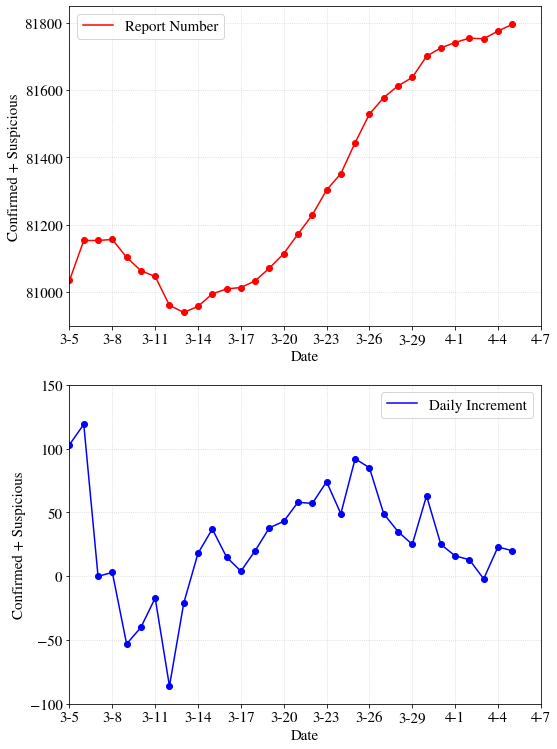

In [11]:
xtk2 = [50, 53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83]
xtkshow2 = ['3-5', '3-8', '3-11', '3-14', '3-17', '3-20', '3-23', '3-26', '3-29', '4-1', '4-4', '4-7']

matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

plt.figure(figsize=(8, 16/1.5))

plt.subplot(2,1,1)
plt.plot(x, yd, label = 'Report Number', c = 'red')
plt.plot(x, yd,'o', c = 'red')

startp = 50 #-1
endp = 68#xtk[-1]
plt.xlim(startp, endp)
plt.xticks(xtk2, xtkshow2)
plt.xlabel("Date")

# plt.yscale('log')
# plt.ylim(-1000, 83000)
plt.ylim(80900, 81850)

plt.ylabel("Confirmed + Suspicious")
# plt.title("Infection Number of 2019-nCoV in the Mainland of China")
plt.grid(linestyle = "dotted", color = "#d3d3d3" , which="both")
plt.legend()


plt.subplot(2,1,2)
plt.plot(x, ydadd, label = 'Daily Increment', c = 'blue')
plt.plot(x, ydadd,'o', c = 'blue')


plt.xlim(startp, endp)
plt.xticks(xtk2, xtkshow2)
plt.xlabel("Date")

# plt.yscale('log')
# plt.ylim(-5300, 13000)
plt.ylim(-100, 150)

plt.ylabel("Confirmed + Suspicious")
# plt.title("Infection Number of 2019-nCoV in the Mainland of China")
plt.legend()

plt.grid(linestyle = "dotted", color = "#d3d3d3" , which="both")
plt.tight_layout()



plt.show()